In [9]:
import pandas as pd

In [10]:
from matplotlib import pyplot as plt

In [11]:
import seaborn as sns

In [12]:
file_path = r'E:\project\powerdata.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

print(data.head())

       DATE  YEAR    FY  STATE             PLANT  UNIT  PLANNED  MAJOR_FORCED  \
0  20130401  2013  2014  DELHI      BADARPUR TPS     1        0           0.0   
1  20130401  2013  2014  DELHI          I.P.CCPP     4        0           0.0   
2  20130401  2013  2014  DELHI          I.P.CCPP     8        0           0.0   
3  20130401  2013  2014  DELHI  PRAGATI CCGT-III     1        0           0.0   
4  20130401  2013  2014  DELHI  PRAGATI CCGT-III     2        0           0.0   

   MINOR_FORCED  FORCED  OTHERS                            REASONS  \
0          95.0    95.0     0.0                  RESERVE SHUT DOWN   
1           0.0     0.0    30.0  GT-NO SCHEDULE FROM BENIFICIARIES   
2           0.0     0.0     0.0  GT-NO SCHEDULE FROM BENIFICIARIES   
3           0.0     0.0   250.0  GT-NO SCHEDULE FROM BENIFICIARIES   
4           0.0     0.0   250.0    GT-TRANSMITTER/SWITCHES PROBLEM   

   REASONS_REGROUPED  
0  Reserve shut down  
1              Other  
2              Other  


In [13]:
data.head()

,DATE,YEAR,FY,STATE,PLANT,UNIT,PLANNED,MAJOR_FORCED,MINOR_FORCED,FORCED,OTHERS,REASONS,REASONS_REGROUPED
0,20130401,2013,2014,DELHI,BADARPUR TPS,1,0,0.0,95.0,95.0,0.0,RESERVE SHUT DOWN,Reserve shut down
1,20130401,2013,2014,DELHI,I.P.CCPP,4,0,0.0,0.0,0.0,30.0,GT-NO SCHEDULE FROM BENIFICIARIES,Other
2,20130401,2013,2014,DELHI,I.P.CCPP,8,0,0.0,0.0,0.0,0.0,GT-NO SCHEDULE FROM BENIFICIARIES,Other
3,20130401,2013,2014,DELHI,PRAGATI CCGT-III,1,0,0.0,0.0,0.0,250.0,GT-NO SCHEDULE FROM BENIFICIARIES,Other
4,20130401,2013,2014,DELHI,PRAGATI CCGT-III,2,0,0.0,0.0,0.0,250.0,GT-TRANSMITTER/SWITCHES PROBLEM,Other


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               1043 non-null   int64  
 1   YEAR               1043 non-null   int64  
 2   FY                 1043 non-null   int64  
 3   STATE              1043 non-null   object 
 4   PLANT              1043 non-null   object 
 5   UNIT               1043 non-null   int64  
 6   PLANNED            1043 non-null   int64  
 7   MAJOR_FORCED       1043 non-null   float64
 8   MINOR_FORCED       1043 non-null   float64
 9   FORCED             1043 non-null   float64
 10  OTHERS             1043 non-null   float64
 11  REASONS            1043 non-null   object 
 12  REASONS_REGROUPED  1043 non-null   object 
dtypes: float64(4), int64(5), object(4)
memory usage: 106.1+ KB


In [15]:
data.describe()

,DATE,YEAR,FY,UNIT,PLANNED,MAJOR_FORCED,MINOR_FORCED,FORCED,OTHERS
count,1.043000e+03,1043.0,1043.0,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,2.013040e+07,2013.0,2014.0,3.233941,21.903164,59.469319,89.745925,149.215244,21.097987
std,1.578380e+00,0.0,0.0,2.259320,72.211616,130.464376,166.879441,184.892399,70.935798
min,2.013040e+07,2013.0,2014.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.013040e+07,2013.0,2014.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.013040e+07,2013.0,2014.0,3.000000,0.000000,0.000000,0.000000,94.000000,0.000000
75%,2.013040e+07,2013.0,2014.0,4.000000,0.000000,61.500000,125.000000,210.000000,0.000000
max,2.013041e+07,2013.0,2014.0,12.000000,600.000000,660.000000,800.000000,800.000000,600.000000


In [16]:
# Convert DATE to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

# Check for missing values
print(data.isnull().sum())

# Drop rows with no outage data
data = data[(data['PLANNED'] > 0) | (data['FORCED'] > 0) | (data['OTHERS'] > 0)]

# Standardize STATE names (e.g., 'DELHI' vs. 'Delhi')
data['STATE'] = data['STATE'].str.upper().str.strip()

DATE                 0
YEAR                 0
FY                   0
STATE                0
PLANT                0
UNIT                 0
PLANNED              0
MAJOR_FORCED         0
MINOR_FORCED         0
FORCED               0
OTHERS               0
REASONS              0
REASONS_REGROUPED    0
dtype: int64


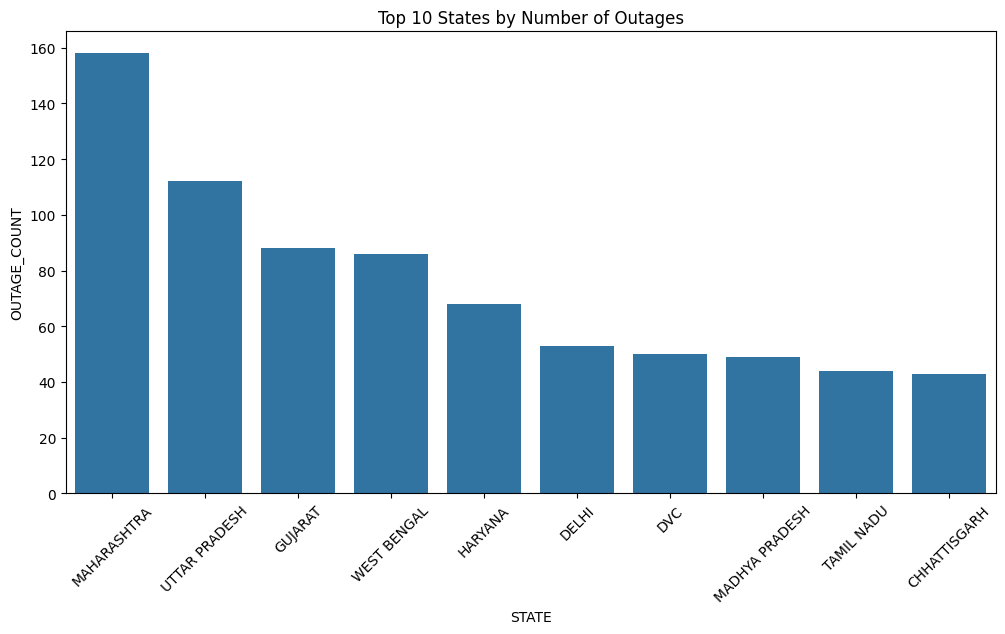

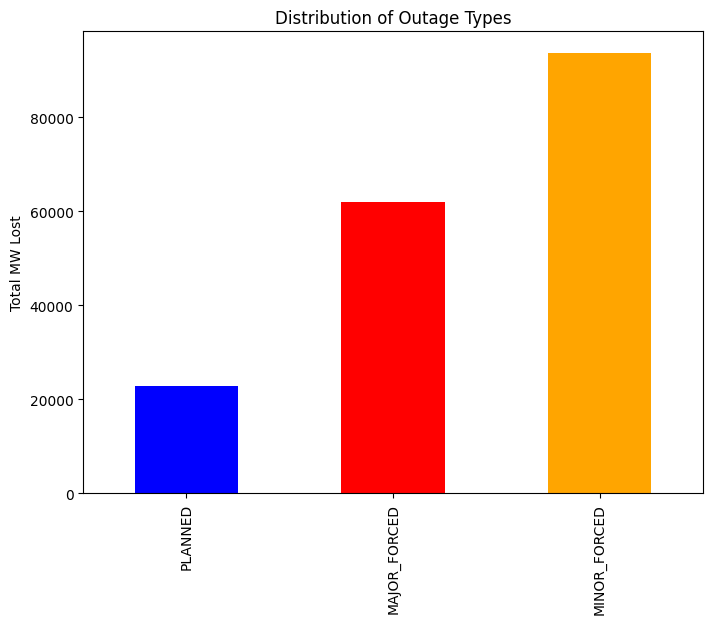

In [17]:
# Total outages per state
state_outages = data['STATE'].value_counts().reset_index()
state_outages.columns = ['STATE', 'OUTAGE_COUNT']

# Plot top 10 states with most outages
plt.figure(figsize=(12, 6))
sns.barplot(data=state_outages.head(10), x='STATE', y='OUTAGE_COUNT')
plt.title('Top 10 States by Number of Outages')
plt.xticks(rotation=45)
plt.show()

# Compare PLANNED vs. FORCED outages
outage_types = data[['PLANNED', 'MAJOR_FORCED', 'MINOR_FORCED']].sum()
plt.figure(figsize=(8, 6))
outage_types.plot(kind='bar', color=['blue', 'red', 'orange'])
plt.title('Distribution of Outage Types')
plt.ylabel('Total MW Lost')
plt.show()

In [18]:
"""
Root Cause Analysis
Questions:

What are the most common reasons for outages?

Which equipment fails most often?
"""

'\nRoot Cause Analysis\nQuestions:\n\nWhat are the most common reasons for outages?\n\nWhich equipment fails most often?\n'

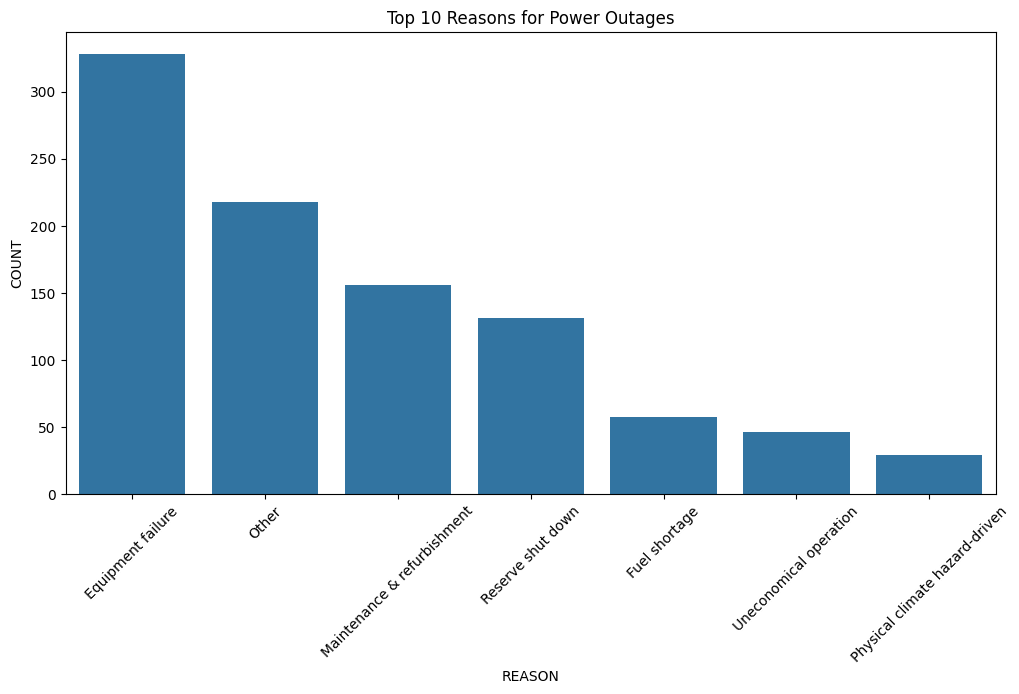

REASONS
WATER WALL TUBE LEAKAGE              42
NON STABLISED UNIT                   42
BOILER AUX. MISC. PROMLEMS           35
ECONOMISER TUBE LEAKAGE              32
MILLING SYSTEM /RC FEEDER PROBLEM    15
Name: count, dtype: int64


In [19]:
# Top 10 outage reasons
reason_counts =data['REASONS_REGROUPED'].value_counts().reset_index()
reason_counts.columns = ['REASON', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(data=reason_counts.head(10), x='REASON', y='COUNT')
plt.title('Top 10 Reasons for Power Outages')
plt.xticks(rotation=45)
plt.show()

# Filter for equipment failures only
equipment_failures = data[data['REASONS_REGROUPED'] == 'Equipment failure']
top_equipment_issues = equipment_failures['REASONS'].value_counts().head(5)
print(top_equipment_issues)

In [20]:
"""
Questions:

Which states lose the most power due to outages?

Which plants are the worst affected?
"""

'\nQuestions:\n\nWhich states lose the most power due to outages?\n\nWhich plants are the worst affected?\n'

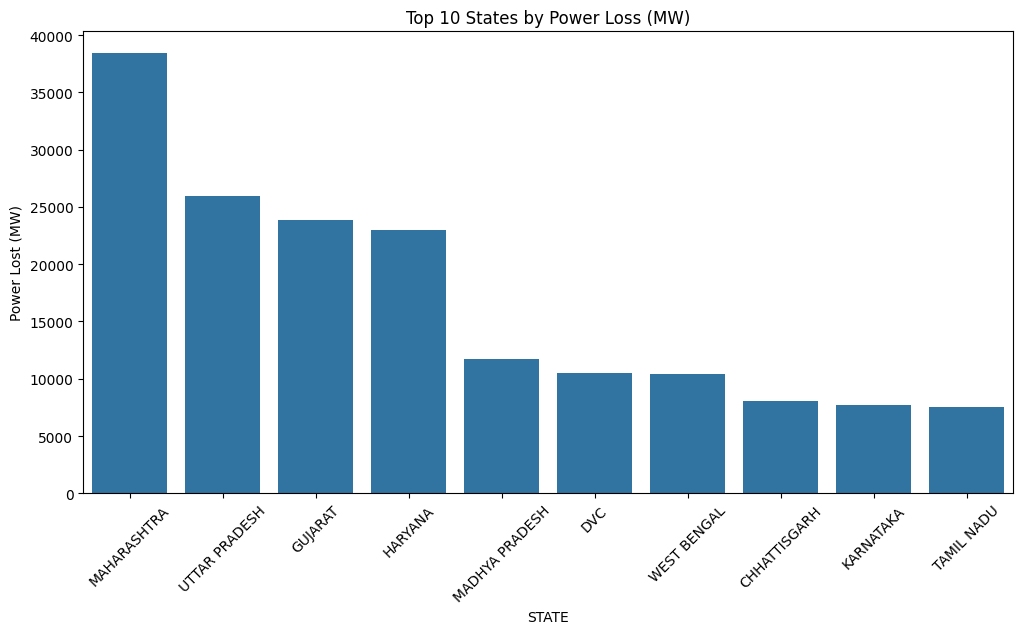

                  PLANT  TOTAL_LOST_MW
82     RAJIV GANDHI TPS         7200.0
36   INDIRA GANDHI STPP         6000.0
74            PARLI TPS         5650.0
64         MUNDRA UMTPP         5600.0
71          PANIPAT TPS         5200.0
90        ROSA TPP Ph-I         5100.0
47          KODARMA TPP         5000.0
2          ANPARA C TPS         4800.0
111            UKAI TPS         4780.0
115    VINDHYACHAL STPS         4760.0


In [28]:
# Total MW lost per state
data['TOTAL_LOST_MW'] = data['PLANNED'] + data['FORCED'] + data['OTHERS']

state_capacity_loss = (
    data.groupby('STATE')['TOTAL_LOST_MW']
    .sum()
    .reset_index()
    .sort_values('TOTAL_LOST_MW', ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=state_capacity_loss.head(10), x='STATE', y='TOTAL_LOST_MW')
plt.title('Top 10 States by Power Loss (MW)')
plt.xticks(rotation=45)
plt.ylabel("Power Lost (MW)")
plt.show()

# Worst affected plants
plant_capacity_loss = (
    data.groupby('PLANT')['TOTAL_LOST_MW']
    .sum()
    .reset_index()
    .sort_values('TOTAL_LOST_MW', ascending=False)
)

print(plant_capacity_loss.head(10))


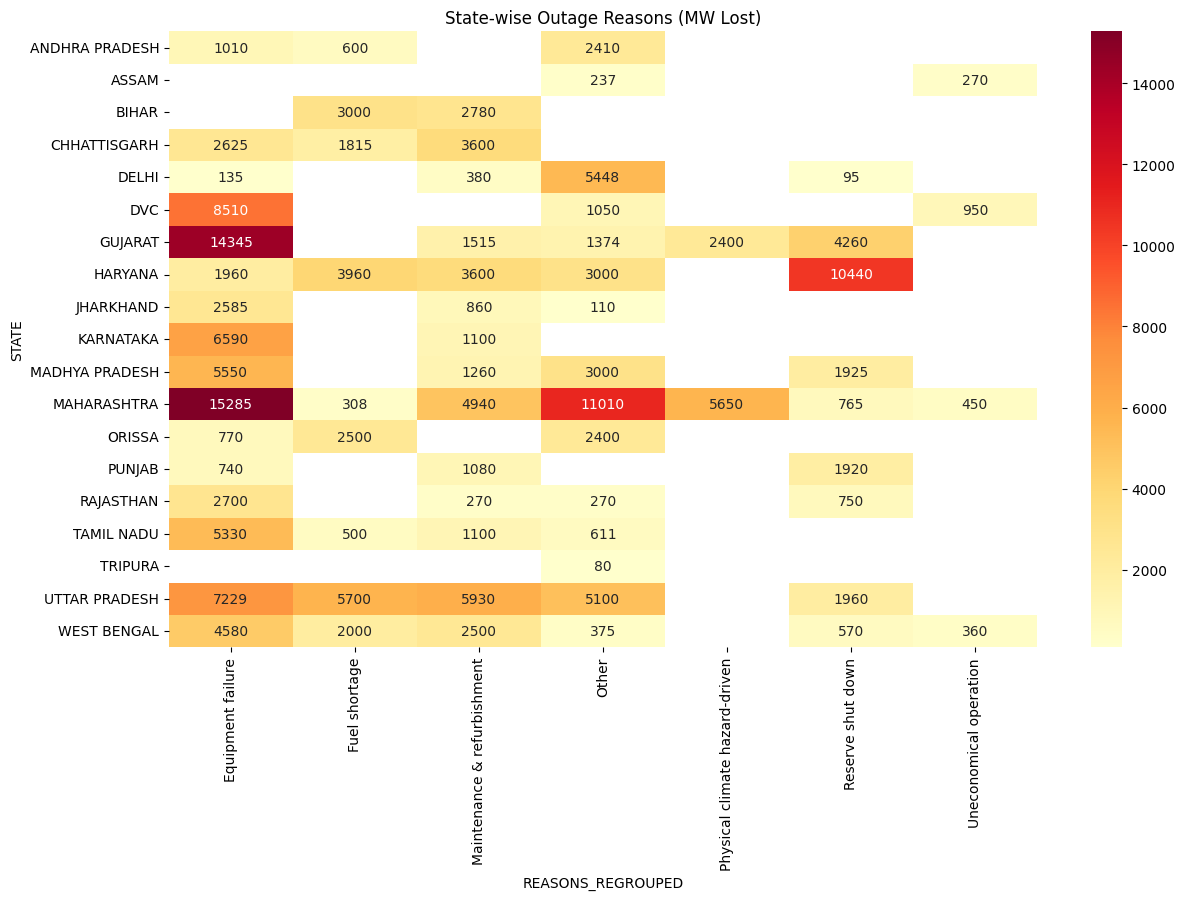

In [29]:
# Pivot table for state-wise outage reasons
pivot_table = data.pivot_table(index='STATE', columns='REASONS_REGROUPED', values='TOTAL_LOST_MW', aggfunc='sum')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('State-wise Outage Reasons (MW Lost)')
plt.show()

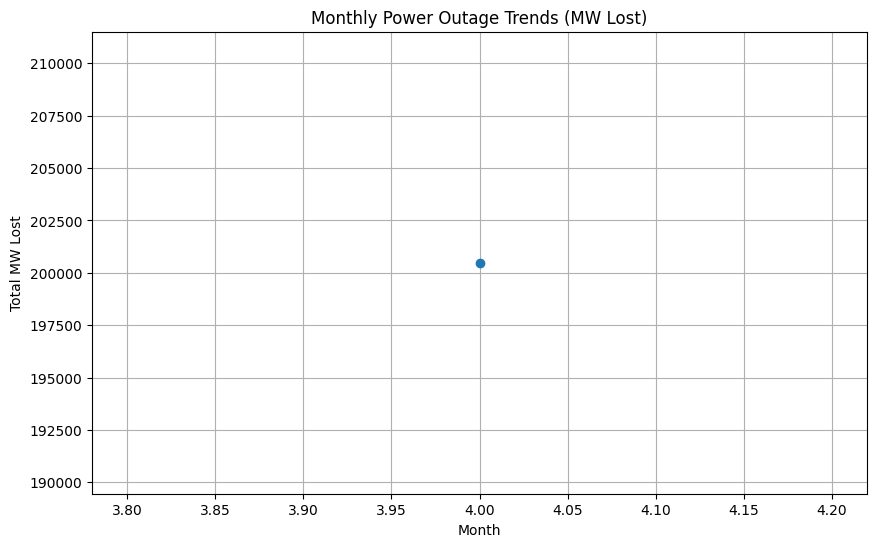

In [30]:
# Monthly outage trends
data['MONTH'] = data['DATE'].dt.month
monthly_outages = data.groupby('MONTH')['TOTAL_LOST_MW'].sum()

plt.figure(figsize=(10, 6))
monthly_outages.plot(kind='line', marker='o')
plt.title('Monthly Power Outage Trends (MW Lost)')
plt.xlabel('Month')
plt.ylabel('Total MW Lost')
plt.grid()
plt.show()